# Graphical representation of missing values with missingno

## Contents 

1.  [Matrix Plotting](#matrixPlotting)
2. [Dendrograms](#dendrograms) 
3. [Heat Map](#heatMap)
4. [Bar Graph](#barGraph) 


### I came across an interesting module recently which visualizes the missing values and wanted to see how it works and its beautiful! So I went and made a small kernel about it. I took the wikipedia movie plots to work on. It has 34886 rows and 8 columns.

#### Click [here](https://github.com/ResidentMario/missingno) to go to its github repo. 

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

### Importing and reading the dataset

In [6]:
wiki_df = pd.read_csv("wiki_movie_plots_deduped.csv")

In [7]:
wiki_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [8]:
wiki_df.shape

(34886, 8)

In [9]:
wiki_df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [10]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


### Replacing Unknown, unknown and NaN values with np.NaN

In [11]:
wiki_df["Director"] = wiki_df["Director"].apply(lambda x: np.NaN if x == "Unknown" else x)

In [12]:
wiki_df["Cast"] = wiki_df["Cast"].apply(lambda x: np.NaN if x == "NaN" else x)

In [13]:
wiki_df["Genre"] = wiki_df["Genre"].apply(lambda x: np.NaN if x == "unknown" else x)

In [14]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          33762 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             28803 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


<h3 id="matrixPlotting">Plotting with missingno matrix</h3>

#### See [more](https://github.com/ResidentMario/missingno#matrix). 

<AxesSubplot:>

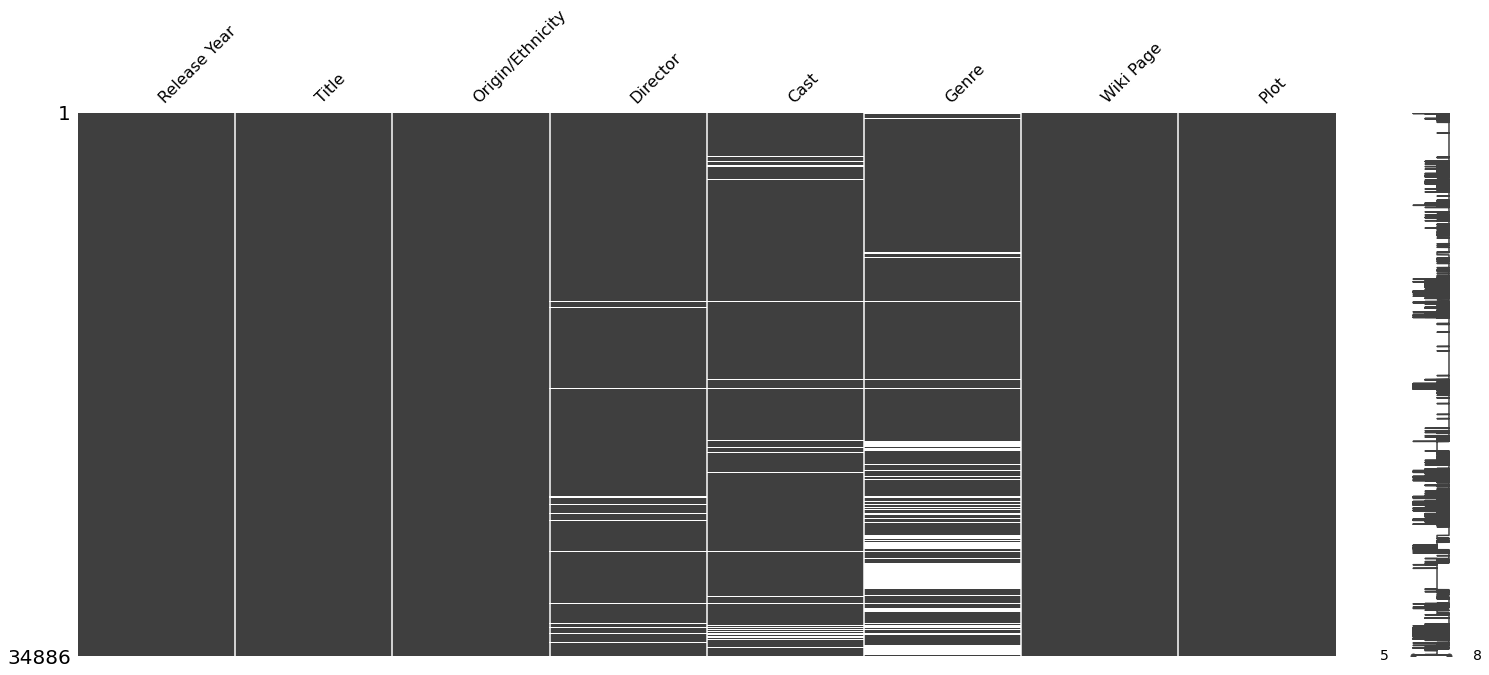

In [15]:
msno.matrix(wiki_df)

In [16]:
# wiki_df.Cast

In [17]:
wiki_df[wiki_df["Title"].duplicated(keep="first")==True].head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
27,1910,A Christmas Carol,American,J. Searle Dawley,"Marc McDermott, Charles Stanton Ogle",NaN,https://en.wikipedia.org/wiki/A_Christmas_Caro...,"The day before Christmas, Ebenezer Scrooge ref..."
55,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
85,1914,Laughing Gas,American,Charlie Chaplin,"Charlie Chaplin, Fritz Schade",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(19...,We are told Charlie is a dental assistant. He ...
240,1918,The Squaw Man,American,Cecil B. DeMille,"Elliott Dexter, Ann Little",western,https://en.wikipedia.org/wiki/The_Squaw_Man_(1...,"As described in a film magazine,[3] Jim Wynneg..."
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."


In [18]:
wiki_df[wiki_df["Wiki Page"].duplicated(keep="first")==True].head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
286,1919,Nine-Tenths of the Law,American,B. Reeves Eason,"Mitchell Lewis, Jimsy Maye",drama,https://en.wikipedia.org/wiki/Nine-Tenths_of_t...,"As described in a film magazine,[1] Jules Lene..."
370,1921,Among Those Present,American,Fred C. Newmeyer,Harold Lloyd,comedy,https://en.wikipedia.org/wiki/Among_Those_Present,Mrs. O'Brien (Herring) is eager to be accepted...
400,1921,Now or Never,American,"Fred C. Newmeyer, Hal Roach","Harold Lloyd, Mildred Davis",comedy,https://en.wikipedia.org/wiki/Now_or_Never_(19...,"A young woman, who is employed as a nanny to a..."
603,1926,A Kiss for Cinderella,American,Herbert Brenon,"Betty Bronson, Esther Ralston, Dorothy Cumming","fantasy, romance",https://en.wikipedia.org/wiki/A_Kiss_for_Cinde...,"In London during World War One, a simple-minde..."
1308,1932,Girl of the Rio,American,Herbert Brenon,"Dolores del Río, Leo Carrillo",romance,https://en.wikipedia.org/wiki/Girl_of_the_Rio,"South of the U.S. border, Don José Tostado, a ..."


<h3 id="dendrograms"> Plotting with dendrograms</h3> 

####  It splits using the minimum distance between the clusters that are created using hierarchial clustering algorithm. See [more](https://github.com/ResidentMario/missingno#dendrogram).

<AxesSubplot:>

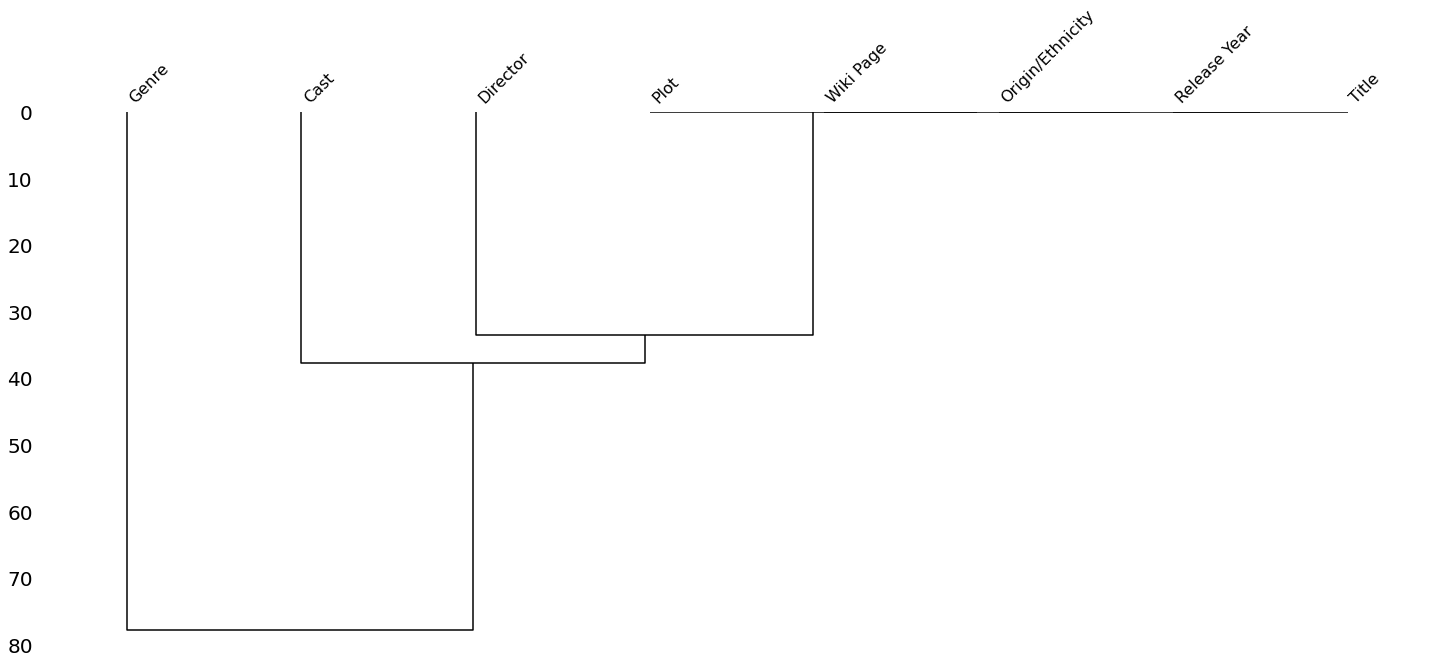

In [19]:
msno.dendrogram(wiki_df)

<h3 id="heatMap">Heat Map</h3>

#### See [more](https://github.com/ResidentMario/missingno#heatmap).

<AxesSubplot:>

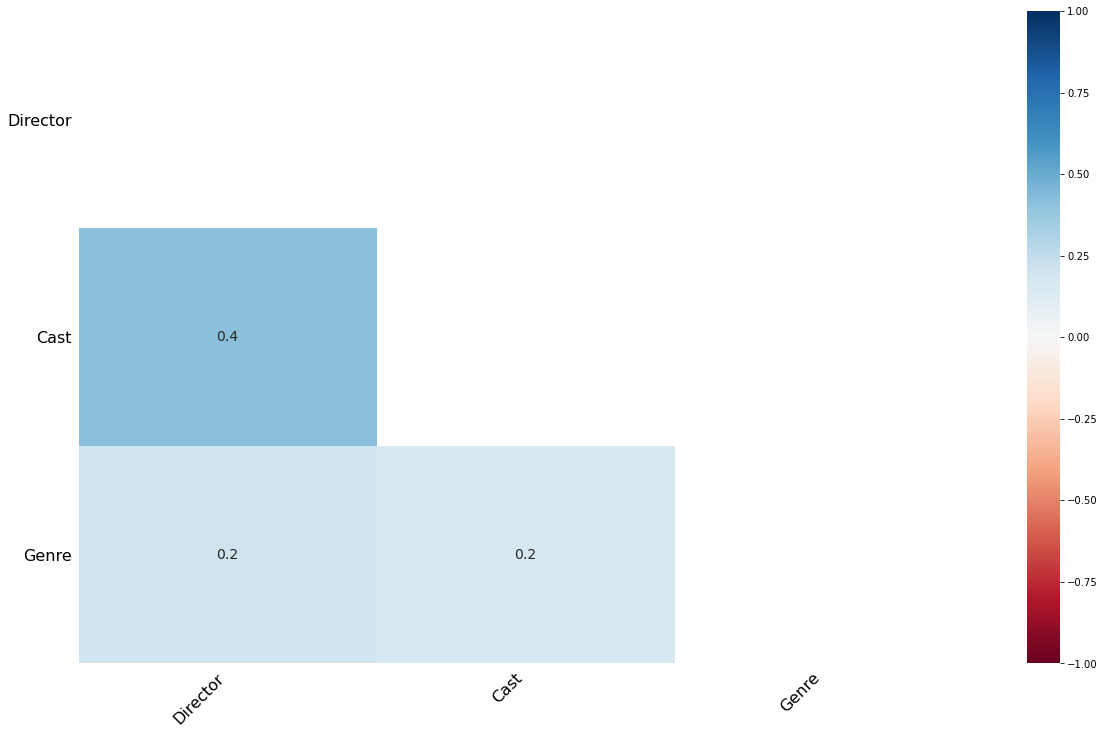

In [20]:
msno.heatmap(wiki_df)

<h3 id="barGraph">Bar Graph</h3>

#### See [more](https://github.com/ResidentMario/missingno#bar-chart).

<AxesSubplot:>

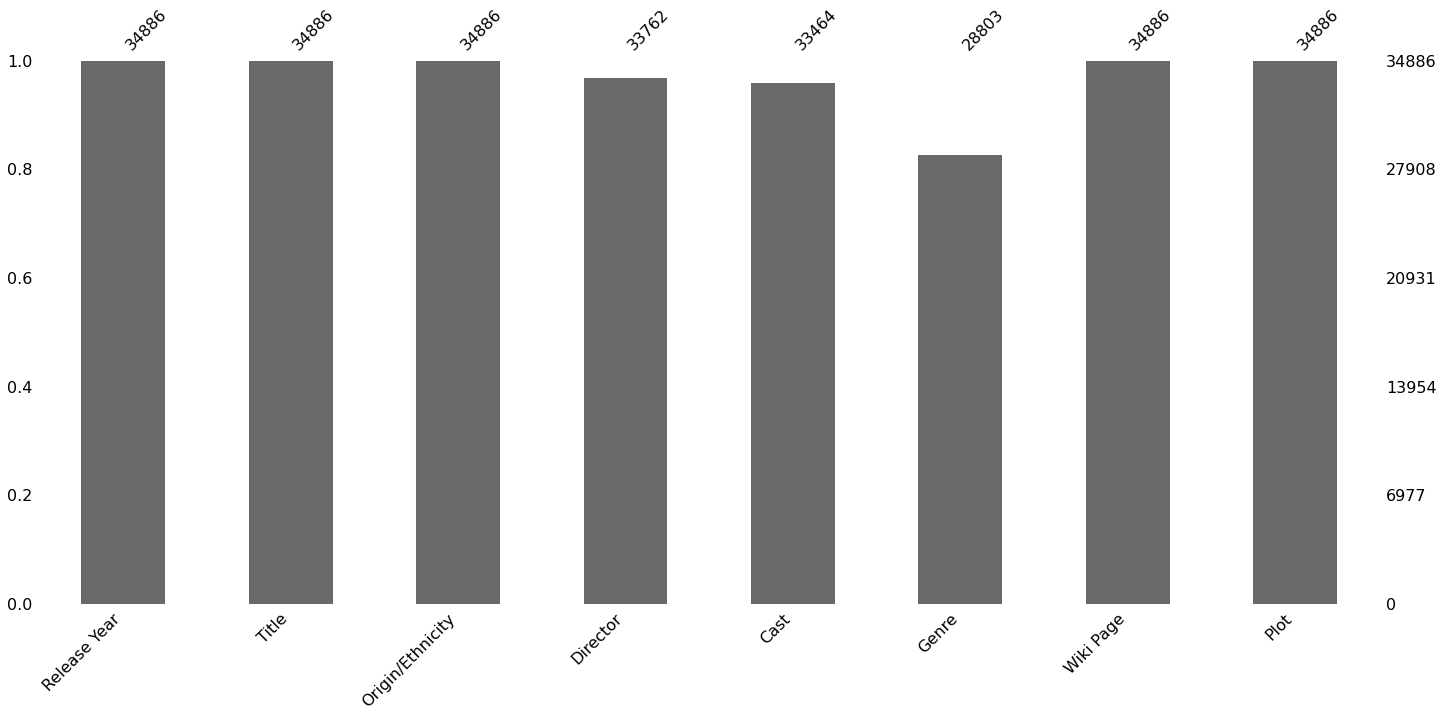

In [21]:
msno.bar(wiki_df)

In [23]:

from bokeh.io import output_notebook
import bokeh.models.widgets as bk
import jupyter_bokeh as jbk
import ipywidgets as ip

In [24]:

output_notebook()

Loading BokehJS ...

In [25]:

bk_slider = bk.Slider(start=0, end=10, value=0)
ip_slider = ip.IntSlider(min=0, max=10, value=0)

def on_change_bk(_attr, _old, new):
    ip_slider.value = new
    
def on_change_ip(change):
    new = change["new"]
    bk_slider.value = new
    
bk_slider.on_change("value", on_change_bk)
ip_slider.observe(on_change_ip, names="value")

ip.VBox(children=[jbk.BokehModel(bk_slider), ip_slider])

In [26]:
bk_slider.value = 5

In [27]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [39]:

import numpy as np
from bokeh.plotting import figure
from bokeh.io import  push_notebook, show, output_notebook
import bokeh.models.widgets as bk
from bokeh.layouts import row
import jupyter_bokeh as jbk
import ipywidgets as ip

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

In [40]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)

In [41]:
jbk.BokehModel(p)

BokehModel(render_bundle={'docs_json': {'486bf654-713a-48f2-9549-051e6c2b7983': {'roots': {'references': [{'at…

In [42]:
ip.interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>

In [43]:

opts = dict(plot_width=250, plot_height=250, min_border=0)

p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t = show(row(p1, p2), notebook_handle=True)

In [44]:
t

In [46]:
# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)

In [49]:

# and this will update the right plot circle color because it was in the last shown cell
r2.glyph.fill_color = "pink"
push_notebook()